In [1]:
# importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [2]:
# loading the excel file 
file_path = "online_retail_II.xlsx"

In [3]:
# Load sheet names to determine structure
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

In [4]:
# printing the names of the sheet present in our excel file
print(sheet_names)

['Year 2009-2010', 'Year 2010-2011']


In [5]:
# Load and concatenate both sheets
df_1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df_2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

In [6]:
# Combine data
df = pd.concat([df_1, df_2], ignore_index=True)

In [7]:
# to determine the number of rows and columns
df.shape

(1067371, 8)

In [8]:
# print the first five rows 
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [9]:
# print last five rows 
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [10]:
# printing all the names of the columns 
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [11]:
# display a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [12]:
# generate descriptive statistics for numeric columns
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [13]:
#Removing Duplicates
filtered_data = df[['Country','Customer ID']].drop_duplicates()
filtered_data.head()

,Country,Customer ID
0,United Kingdom,13085.0
12,United Kingdom,13078.0
31,United Kingdom,15362.0
54,United Kingdom,18102.0
71,France,12682.0


In [14]:
# filtered data shape i.e rows and columns
filtered_data.shape

(5970, 2)

<Axes: xlabel='Country'>

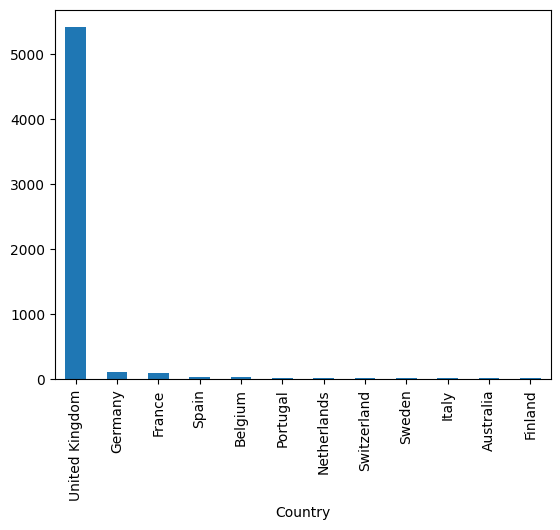

In [15]:
# making the bar graph according to country value counts
filtered_data.Country.value_counts()[:12].plot(kind='bar')

In [16]:
uk_data = df[df.Country == 'United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981330 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      981330 non-null  object        
 1   StockCode    981330 non-null  object        
 2   Description  976948 non-null  object        
 3   Quantity     981330 non-null  int64         
 4   InvoiceDate  981330 non-null  datetime64[ns]
 5   Price        981330 non-null  float64       
 6   Customer ID  741301 non-null  float64       
 7   Country      981330 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 67.4+ MB


In [17]:
uk_data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,981330.000000,981330,981330.000000,741301.000000
mean,8.858259,2011-01-01 09:04:09.776283136,4.537892,15554.046300
min,-80995.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-07-07 11:25:00,1.250000,14203.000000
50%,3.000000,2010-12-06 16:57:00,2.100000,15551.000000
75%,10.000000,2011-07-20 16:17:00,4.150000,16936.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,172.638944,NaN,126.743401,1594.076188


In [18]:
#filtering quantities which are greater than zero
uk_data = uk_data[uk_data.Quantity > 0]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961224 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      961224 non-null  object        
 1   StockCode    961224 non-null  object        
 2   Description  959531 non-null  object        
 3   Quantity     961224 non-null  int64         
 4   InvoiceDate  961224 non-null  datetime64[ns]
 5   Price        961224 non-null  float64       
 6   Customer ID  725296 non-null  float64       
 7   Country      961224 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 66.0+ MB


In [19]:
uk_data = uk_data[['Customer ID','InvoiceDate','Invoice','Quantity','Price']]

In [20]:
#Total Purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['Price']
uk_data.head()

,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPurchase
0,13085.0,2009-12-01 07:45:00,489434,12,6.95,83.4
1,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
2,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
3,13085.0,2009-12-01 07:45:00,489434,48,2.10,100.8
4,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0


In [21]:
uk_data_group = uk_data.groupby('Customer ID').agg({'InvoiceDate': lambda date:(date.max() - date.min()).days,
                                                    'Invoice': lambda num : len(num),
                                                    'Quantity': lambda quant : quant.sum(),
                                                    'TotalPurchase': lambda price : price.sum()})

In [22]:
uk_data_group.head()

,InvoiceDate,Invoice,Quantity,TotalPurchase
Customer ID,,,,
12346.0,400,34,74285,77556.46
12608.0,0,16,323,415.79
12745.0,87,22,467,723.85
12746.0,0,17,97,254.55
12747.0,730,257,2758,9276.54


In [23]:
uk_data_group.columns = ['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
Customer ID,,,,
12346.0,400,34,74285,77556.46
12608.0,0,16,323,415.79
12745.0,87,22,467,723.85
12746.0,0,17,97,254.55
12747.0,730,257,2758,9276.54


In [24]:
#Calculate Ave. Order Value
uk_data_group['Ave_order_value'] = uk_data_group['spent_money']/uk_data_group['num_transactions']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value
Customer ID,,,,,
12346.0,400,34,74285,77556.46,2281.072353
12608.0,0,16,323,415.79,25.986875
12745.0,87,22,467,723.85,32.902273
12746.0,0,17,97,254.55,14.973529
12747.0,730,257,2758,9276.54,36.095486


In [25]:
#calculate Purchase Frequeny
purchase_frequency  = sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value
Customer ID,,,,,
12346.0,400,34,74285,77556.46,2281.072353
12608.0,0,16,323,415.79,25.986875
12745.0,87,22,467,723.85,32.902273
12746.0,0,17,97,254.55,14.973529
12747.0,730,257,2758,9276.54,36.095486


In [26]:
purchase_frequency

135.493368204745

In [27]:
#calculate Repeat Rate
repeat_rate = uk_data_group[uk_data_group['num_transactions'] > 1].shape[0]/uk_data_group.shape[0]
repeat_rate

0.9803848309359238

In [28]:
#Churn Rate
churn_rate = 1 - repeat_rate
churn_rate

0.019615169064076232

In [29]:
#Profit Margin
uk_data_group['profit_margin'] = uk_data_group['spent_money']*0.05
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin
Customer ID,,,,,,
12346.0,400,34,74285,77556.46,2281.072353,3877.8230
12608.0,0,16,323,415.79,25.986875,20.7895
12745.0,87,22,467,723.85,32.902273,36.1925
12746.0,0,17,97,254.55,14.973529,12.7275
12747.0,730,257,2758,9276.54,36.095486,463.8270


In [30]:
#Customer Value
uk_data_group['CLV'] = (uk_data_group['Ave_order_value'] * purchase_frequency)/churn_rate
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin,CLV
Customer ID,,,,,,,
12346.0,400,34,74285,77556.46,2281.072353,3877.8230,1.575669e+07
12608.0,0,16,323,415.79,25.986875,20.7895,1.795064e+05
12745.0,87,22,467,723.85,32.902273,36.1925,2.272751e+05
12746.0,0,17,97,254.55,14.973529,12.7275,1.034309e+05
12747.0,730,257,2758,9276.54,36.095486,463.8270,2.493325e+05


In [31]:
uk_data_group['cust_lifetime_value'] = uk_data_group['CLV'] + uk_data_group['profit_margin']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,Ave_order_value,profit_margin,CLV,cust_lifetime_value
Customer ID,,,,,,,,
12346.0,400,34,74285,77556.46,2281.072353,3877.8230,1.575669e+07,1.576057e+07
12608.0,0,16,323,415.79,25.986875,20.7895,1.795064e+05,1.795272e+05
12745.0,87,22,467,723.85,32.902273,36.1925,2.272751e+05,2.273113e+05
12746.0,0,17,97,254.55,14.973529,12.7275,1.034309e+05,1.034436e+05
12747.0,730,257,2758,9276.54,36.095486,463.8270,2.493325e+05,2.497963e+05


In [32]:
uk_data.head()

,Customer ID,InvoiceDate,Invoice,Quantity,Price,TotalPurchase
0,13085.0,2009-12-01 07:45:00,489434,12,6.95,83.4
1,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
2,13085.0,2009-12-01 07:45:00,489434,12,6.75,81.0
3,13085.0,2009-12-01 07:45:00,489434,48,2.10,100.8
4,13085.0,2009-12-01 07:45:00,489434,24,1.25,30.0


In [33]:
# Preview the top rows from each sheet to check structure and compatibility
df_1_preview = pd.read_excel(file_path, sheet_name='Year 2009-2010', nrows=5)
df_2_preview = pd.read_excel(file_path, sheet_name='Year 2010-2011', nrows=5)


In [34]:
print(df_1_preview, df_2_preview)

   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom      Invoice StockCode                          Description  Quantity  \
0   536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1   536365     71053                  WHITE METAL LANTERN         6   


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Merge both years of data
df = pd.concat([df_1, df_2], ignore_index=True)

In [37]:
# Clean data
df.dropna(subset=["Customer ID"], inplace=True)
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

In [38]:
# Add TotalPrice
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [39]:
# Feature Engineering per Customer
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

clv_df = df.groupby("Customer ID").agg({
    "InvoiceDate": [lambda x: (snapshot_date - x.max()).days, 
                    lambda x: (x.max() - x.min()).days,
                    "count"],
    "Invoice": "nunique",
    "TotalPrice": "sum"
})

clv_df.columns = ["Recency", "CustomerAge", "Frequency", "UniqueInvoices", "Monetary"]
clv_df["AvgOrderValue"] = clv_df["Monetary"] / clv_df["Frequency"]
clv_df = clv_df[clv_df["Monetary"] > 0]

In [40]:
# Model - Predict Monetary (as proxy for CLV)
X = clv_df[["Recency", "CustomerAge", "Frequency", "AvgOrderValue"]]
y = clv_df["Monetary"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2, model.coef_, model.intercept_

(276211307.7854659,
 0.2481324633414529,
 array([ 0.39036282,  4.6766803 , 15.00925598,  3.27058355]),
 np.float64(-625.3239154634866))

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [45]:
# Total price for each row
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [46]:
# Snapshot date for recency calculation
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

In [47]:
# Aggregate per customer
clv_df = df.groupby("Customer ID").agg({
    "InvoiceDate": [
        lambda x: (snapshot_date - x.max()).days,     # Recency
        lambda x: (x.max() - x.min()).days,           # Customer age
        "count"                                       # Frequency
    ],
    "Invoice": "nunique",                             # Unique invoices
    "TotalPrice": "sum"                               # Monetary value
})

clv_df.columns = ["Recency", "CustomerAge", "Frequency", "UniqueInvoices", "Monetary"]
clv_df["AvgOrderValue"] = clv_df["Monetary"] / clv_df["Frequency"]
clv_df = clv_df[clv_df["Monetary"] > 0]

In [48]:
# Features and target
X = clv_df[["Recency", "CustomerAge", "Frequency", "AvgOrderValue"]]
y = clv_df["Monetary"]

In [49]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error: 276211307.7854659
R² Score: 0.2481324633414529
Model Coefficients: [ 0.39036282  4.6766803  15.00925598  3.27058355]
Model Intercept: -625.3239154634866


# 📊 VISUALIZATION & INSIGHTS

## 1️⃣ Distribution of Monetary Value (CLV)

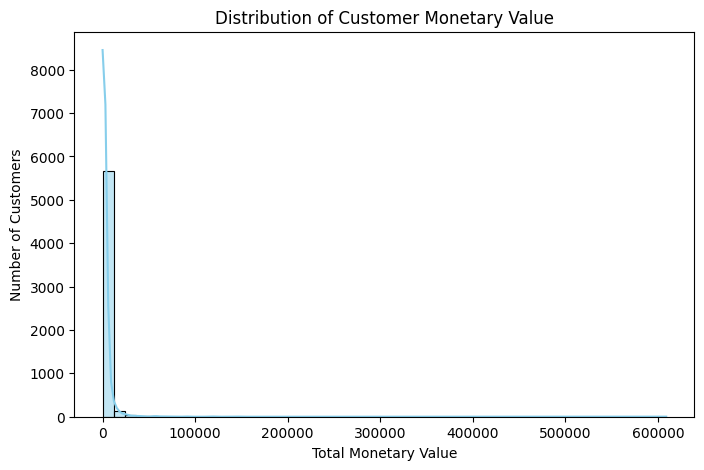

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(clv_df["Monetary"], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Customer Monetary Value")
plt.xlabel("Total Monetary Value")
plt.ylabel("Number of Customers")
plt.show()

## 2️⃣ Recency vs Monetary Value

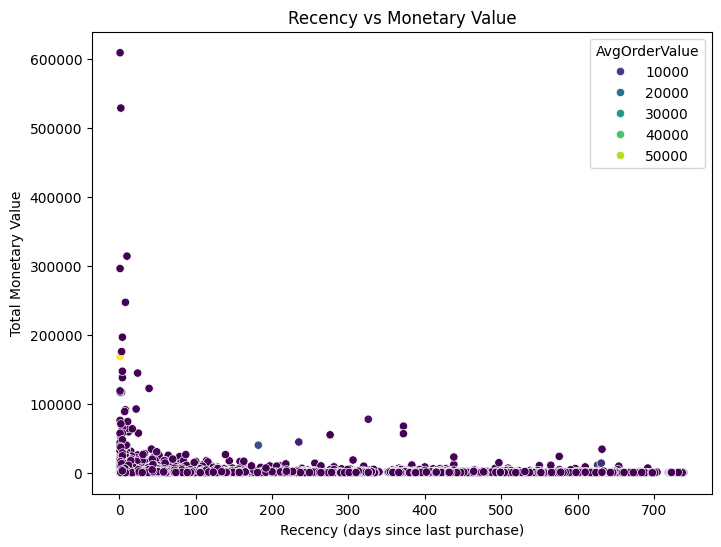

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clv_df, x="Recency", y="Monetary", hue="AvgOrderValue", palette="viridis")
plt.title("Recency vs Monetary Value")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Total Monetary Value")
plt.show()

## 3️⃣ Customer Segmentation Based on Frequency & AvgOrderValue

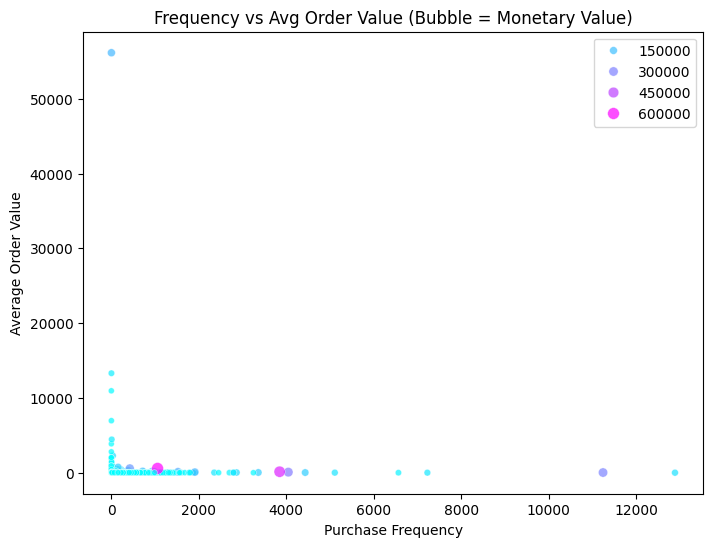

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clv_df, x="Frequency", y="AvgOrderValue", size="Monetary", hue="Monetary", palette="cool", alpha=0.7)
plt.title("Frequency vs Avg Order Value (Bubble = Monetary Value)")
plt.xlabel("Purchase Frequency")
plt.ylabel("Average Order Value")
plt.legend(loc="upper right")
plt.show()

## 4️⃣ Correlation Heatmap of Features

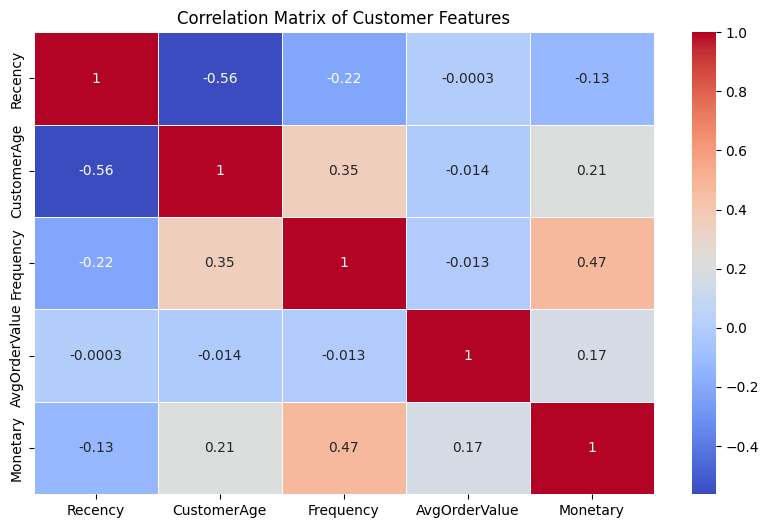

In [53]:
plt.figure(figsize=(10, 6))
corr_matrix = clv_df[["Recency", "CustomerAge", "Frequency", "AvgOrderValue", "Monetary"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Customer Features")
plt.show()

## 5️⃣ Actual vs Predicted CLV (Model Performance)

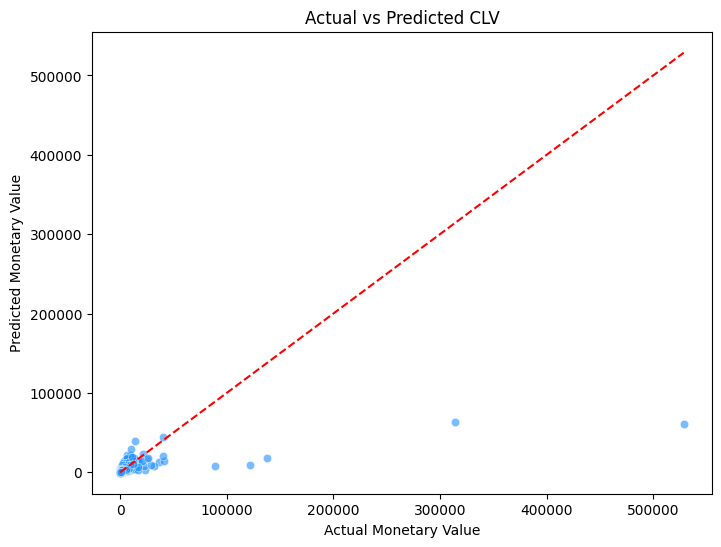

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Monetary Value")
plt.ylabel("Predicted Monetary Value")
plt.title("Actual vs Predicted CLV")
plt.show()

# 🧠 Advanced Business Insights

## ✅ 1. Top 10% High-Value Customers

In [55]:
top_10_percent_threshold = clv_df["Monetary"].quantile(0.90)
high_value_customers = clv_df[clv_df["Monetary"] >= top_10_percent_threshold]

print("Top 10% High-Value Customers:", len(high_value_customers))

Top 10% High-Value Customers: 588


## ✅ 2. At-Risk Customers

In [56]:
recency_threshold = clv_df["Recency"].quantile(0.90)
at_risk_customers = clv_df[(clv_df["Monetary"] >= top_10_percent_threshold) &
                           (clv_df["Recency"] >= recency_threshold)]

print("At-Risk High Spenders:", len(at_risk_customers))

At-Risk High Spenders: 10


## ✅ 3. Loyal Customers

In [57]:
loyal_customers = clv_df[(clv_df["Frequency"] > clv_df["Frequency"].quantile(0.75)) &
                         (clv_df["Recency"] < clv_df["Recency"].quantile(0.25))]

print("Loyal Customers:", len(loyal_customers))

Loyal Customers: 747


## ✅ 4. New Customers

In [58]:
new_customers = clv_df[clv_df["CustomerAge"] < clv_df["CustomerAge"].quantile(0.25)]

print("New Customers:", len(new_customers))

New Customers: 0


## ✅ 5. High Potential Customers

In [59]:
potential_customers = clv_df[(clv_df["Monetary"] < top_10_percent_threshold) &
                             (clv_df["Frequency"] > clv_df["Frequency"].median()) &
                             (clv_df["AvgOrderValue"] > clv_df["AvgOrderValue"].median())]

print("High Potential Customers (Upsell Targets):", len(potential_customers))

High Potential Customers (Upsell Targets): 855


## 🧾 Summary Table (Counts of Each Segment)

In [60]:
summary = {
    "High-Value": len(high_value_customers),
    "At-Risk": len(at_risk_customers),
    "Loyal": len(loyal_customers),
    "New": len(new_customers),
    "Potential": len(potential_customers)
}

summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["Customer Count"])
print(summary_df)


            Customer Count
High-Value             588
At-Risk                 10
Loyal                  747
New                      0
Potential              855


## 🧠 Business Actions Based on Segments
| Segment    | Suggested Strategy                      |
| ---------- | --------------------------------------- |
| High-Value | Loyalty rewards, early access offers    |
| At-Risk    | Win-back emails, limited-time discounts |
| Loyal      | Referral programs, upselling            |
| New        | Welcome offers, onboarding campaigns    |
| Potential  | Personalized recommendations, bundles   |


# 🚀 Advanced Enhancements for CLV Analysis
Here are 6 powerful next-level additions, each with purpose and code.


## 1️⃣ RFM Segmentation with K-Means Clustering

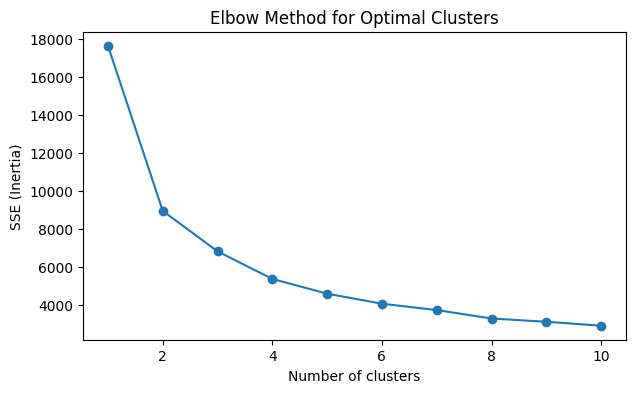

,Recency,CustomerAge,Frequency,UniqueInvoices,Monetary,AvgOrderValue
Cluster,,,,,,
0,387.438084,46.567757,15.737150,1.437500,283.636519,40.357479
1,28.004570,562.324448,423.200305,17.708302,10099.130752,71.837598
2,30.630104,276.630905,58.328263,3.434748,921.527904,29.709887
3,277.498753,275.098504,93.574190,4.343516,1774.748396,51.985636


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use only RFM features
rfm = clv_df[["Recency", "Frequency", "Monetary"]].copy()

# Log transformation to reduce skew
rfm_log = np.log1p(rfm)

# Scale data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# Determine optimal clusters with Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Apply KMeans with optimal cluster (let's assume 4 for now)
kmeans = KMeans(n_clusters=4, random_state=1)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Merge back to main DataFrame
clv_df["Cluster"] = rfm["Cluster"]

# View cluster characteristics
clv_df.groupby("Cluster").mean(numeric_only=True)


## 2️⃣ Time-Based CLV Forecast (Using Recency Trends)

In [62]:
clv_df["Predicted_6M_CLV"] = clv_df["AvgOrderValue"] * (clv_df["Frequency"] / clv_df["CustomerAge"]) * 180
clv_df["Predicted_12M_CLV"] = clv_df["AvgOrderValue"] * (clv_df["Frequency"] / clv_df["CustomerAge"]) * 365


In [63]:
print(clv_df["Predicted_6M_CLV"])
print(clv_df["Predicted_12M_CLV"])

Customer ID
12346.0    3.490041e+04
12347.0    2.522382e+03
12348.0    1.004122e+03
12349.0    1.398534e+03
12350.0             inf
               ...     
18283.0    7.532064e+02
18284.0             inf
18285.0             inf
18286.0    9.447668e+02
18287.0    1.426019e+03
Name: Predicted_6M_CLV, Length: 5878, dtype: float64
Customer ID
12346.0    7.077027e+04
12347.0    5.114830e+03
12348.0    2.036135e+03
12349.0    2.835916e+03
12350.0             inf
               ...     
18283.0    1.527335e+03
18284.0             inf
18285.0             inf
18286.0    1.915777e+03
18287.0    2.891650e+03
Name: Predicted_12M_CLV, Length: 5878, dtype: float64


## 3️⃣ CLV Bucketing with Business Labels

In [64]:
clv_df["CLV_Level"] = pd.qcut(clv_df["Monetary"], q=4, labels=["Low", "Mid", "High", "Top"])

# Frequency count of segments
clv_df["CLV_Level"].value_counts()


CLV_Level
Low     1470
Top     1470
Mid     1469
High    1469
Name: count, dtype: int64

## 4️⃣ Cohort Analysis (Monthly Retention)

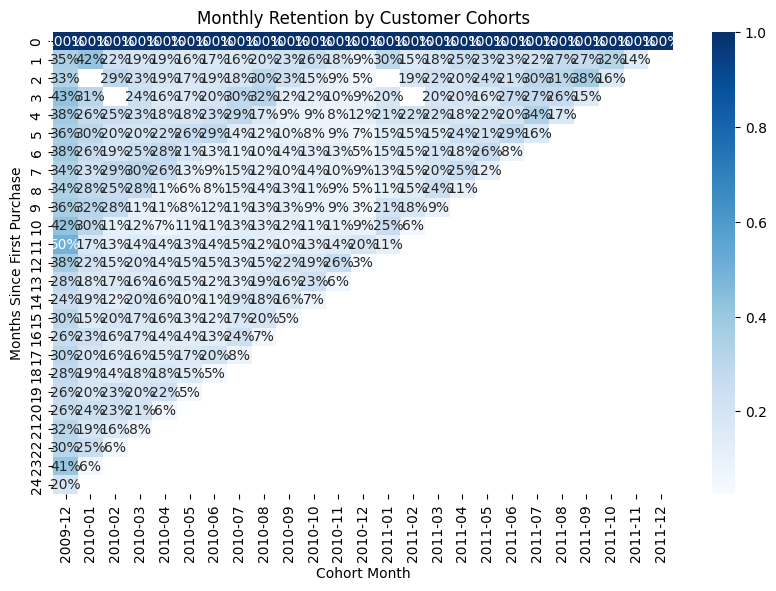

In [65]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['CohortMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')

# Cohort index: months since first purchase
df['CohortIndex'] = (df['InvoiceMonth'].dt.to_timestamp() - df['CohortMonth'].dt.to_timestamp()).dt.days // 30

# Pivot table for retention
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().unstack(0)
cohort_sizes = cohort_data.iloc[0]
retention = cohort_data.divide(cohort_sizes, axis=1)

plt.figure(figsize=(10,6))
sns.heatmap(retention, cmap="Blues", fmt=".0%", annot=True)
plt.title("Monthly Retention by Customer Cohorts")
plt.xlabel("Cohort Month")
plt.ylabel("Months Since First Purchase")
plt.show()


## 5️⃣ Customer Churn Prediction (Binary Classification)

In [66]:
clv_df["Churned"] = (clv_df["Recency"] > 90).astype(int)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = ["Recency", "Frequency", "AvgOrderValue", "CustomerAge"]
X = clv_df[features]
y = clv_df["Churned"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00       748

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



## 6️⃣ Export Segments to CSV for Targeted Marketing

In [67]:
clv_df[clv_df["Cluster"] == 0].to_csv("cluster_0.csv")
clv_df[clv_df["CLV_Level"] == "Top"].to_csv("top_clv_customers.csv")


## 💡 Final Thoughts

| Segment / Feature | Use Case                     |
| ----------------- | ---------------------------- |
| RFM + Clustering  | Automated segmentation       |
| CLV Forecasting   | Predict revenue contribution |
| Cohort Analysis   | Long-term retention insights |
| Churn Model       | Prevent customer loss        |
| CSV Exports       | Email / ad targeting         |
